<a href="https://colab.research.google.com/github/simsekergun/1D_EMI/blob/master/week09/Iris_Toy_Classification_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{ForestGreen}{\text{Iris Dataset as a Toy Example}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# if you already have "graphviz", then skip this cell
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Loading Iris dataset

from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
# Storing iris dataset in a dataframe

iris_df = pd.DataFrame(iris.data)       # Defining dataframe boston_df 
iris_df.columns = iris.feature_names    # Defining the headers of the dataframe
iris_df['Class'] = iris.target          # Adding Price column

iris_df.sample(5)                       # Viewing the first few rows of dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
49,5.0,3.3,1.4,0.2,0
16,5.4,3.9,1.3,0.4,0
99,5.7,2.8,4.1,1.3,1
57,4.9,2.4,3.3,1.0,1
75,6.6,3.0,4.4,1.4,1


In [5]:
# Defining the features and the target of the model

X = iris_df[iris_df.columns[:-1]].values     # Features
y = iris_df[iris_df.columns[-1]].values      # Target 

In [6]:
from sklearn import tree                # Importing 'tree' module from sklearn

tr_clf = tree.DecisionTreeClassifier()  # Instantiating tree classifier
tr_clf.fit(X, y)                        # Fitting the whole data to tree classifier

DecisionTreeClassifier()

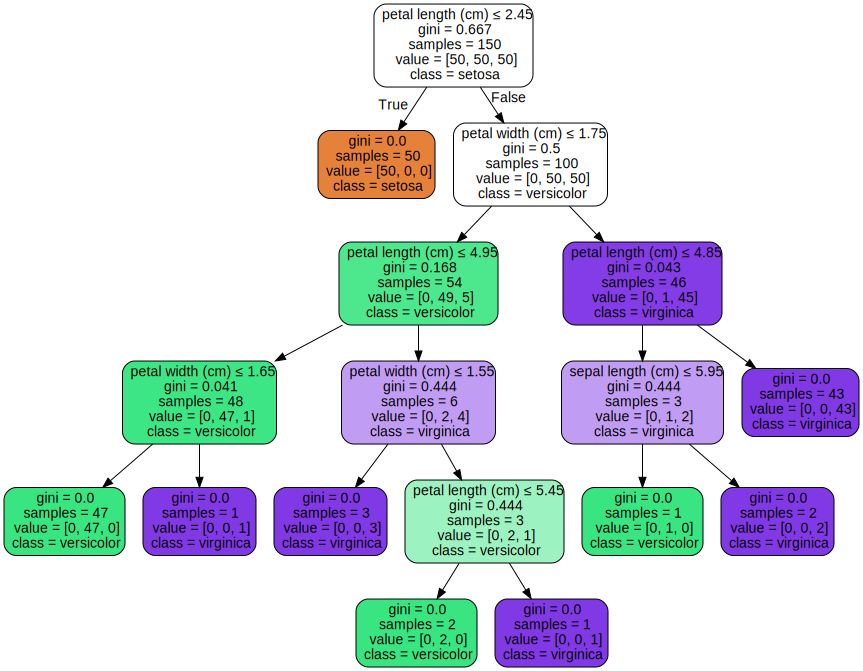

In [7]:
# Importing 'graphviz' to graph the tree diagram

import graphviz      

# Defining the tree graph from 'tr_clf' classifier 
dot_data = tree.export_graphviz(tr_clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

# Plotting the the tree graph
graph

In [8]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

y_pred = tr_clf.predict(X)    # Finding the predictions of 'tr_clf'           

score = metrics.accuracy_score(y, y_pred)  # Calculating accuracy score
report = classification_report(y, y_pred)  # Finding the classification report

print('Decision Tree Classification Report on the Whole Iris Dataset: \n\n', report)

Decision Tree Classification Report on the Whole Iris Dataset: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



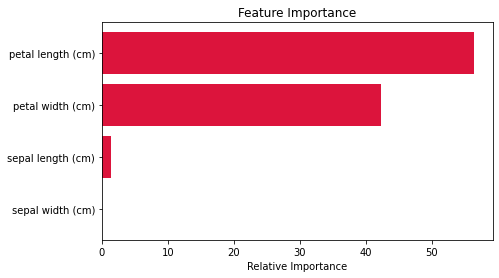

In [9]:
# Calculating the feature importance

feature_importance = tr_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 4))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, iris_df.columns[:-1][sorted_idx])
plt.show()

In [10]:
# Constraining the minimum size of nodes of the tree classifier to 20

tr_clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
tr_clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=20)

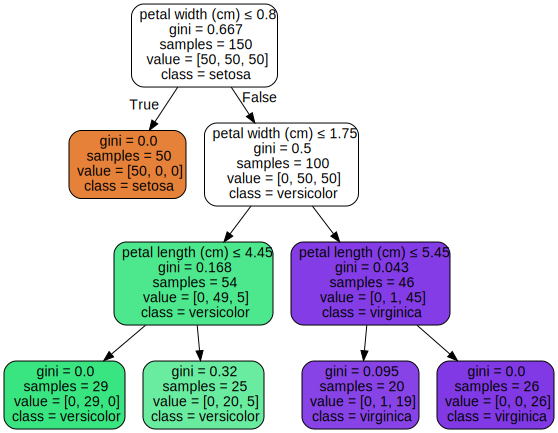

In [11]:
# Finding the new tree

dot_data = tree.export_graphviz(tr_clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [12]:
y_pred = tr_clf.predict(X)   # Predictions of the tree classifier

score = metrics.accuracy_score(y, y_pred) # Calculating the accuracy
report = classification_report(y, y_pred) # Generating the classification report

print('Decision Tree Classification Report on the Whole Iris Dataset: \n\n', report)

Decision Tree Classification Report on the Whole Iris Dataset: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [13]:
# Constraining the minimum size of nodes and the number of nodes of the tree classifier

tr_clf = tree.DecisionTreeClassifier(min_samples_leaf=25, max_leaf_nodes=4)
tr_clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=4, min_samples_leaf=25)

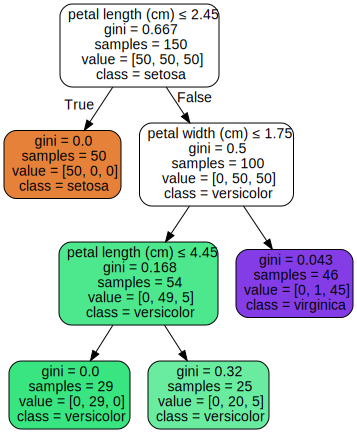

In [14]:
# Generating the new tree graph

dot_data = tree.export_graphviz(tr_clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [15]:
# Generating the predictions and calulating the accuracy of the later tree classifier

y_pred = tr_clf.predict(X)

score = metrics.accuracy_score(y, y_pred) 
report = classification_report(y, y_pred) 

print('Decision Tree Classification Report on the Whole Iris Dataset: \n\n', report)

Decision Tree Classification Report on the Whole Iris Dataset: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

